In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
from plotly.subplots import make_subplots
import plotly.express as px
from umap import UMAP
import warnings
warnings.filterwarnings("ignore")

age: Age of the patient in years

sex: Gender of the patient (1 = male, 0 = female)

cp: Type of chest pain (1–4; from typical angina to asymptomatic)

trestbps: Resting blood pressure in mm Hg at admission

chol: Serum cholesterol level in mg/dl

fbs: Fasting blood sugar > 120 mg/dl (1 = true, 0 = false)

restecg: Resting ECG results (0 = normal, 1 = abnormal ST-T, 2 = left ventricular hypertrophy)

thalach: Maximum heart rate achieved during the test

exang: Exercise-induced angina (1 = yes, 0 = no)

oldpeak: ST depression induced by exercise relative to rest

slope: Slope of the peak ST segment (1 = upsloping, 2 = flat, 3 = downsloping)

ca: Number of major vessels (0–3) colored by fluoroscopy

thal: Thallium test result (3 = normal, 6 = fixed defect, 7 = reversible defect)

target: Diagnosis of heart disease (0 = no disease, 1 = disease present)

In [2]:
df = pd.read_csv("heart-disease(304).csv")

In [3]:
print("Shape of the dataset:", df.shape)
print("-"*70)
print("Columns in the dataset:",df.columns)
print("-"*70)
print("A brief intoduction to the dataset:")
print(df.info())
print("-"*70)
print("Total Null values in the dataset:",df.isna().sum().sum())
print("-"*70)
print("Duplicated values in the dataset:", df.duplicated().sum())
print("-"*70)
print("A proper description of the datase:")
df.describe()

Shape of the dataset: (303, 14)
----------------------------------------------------------------------
Columns in the dataset: Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
----------------------------------------------------------------------
A brief intoduction to the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int

age         sex          cp    trestbps        chol         fbs  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean    54.366337    0.683168    0.966997  131.623762  246.264026    0.148515   
std      9.082101    0.466011    1.032052   17.538143   51.830751    0.356198   
min     29.000000    0.000000    0.000000   94.000000  126.000000    0.000000   
25%     47.500000    0.000000    0.000000  120.000000  211.000000    0.000000   
50%     55.000000    1.000000    1.000000  130.000000  240.000000    0.000000   
75%     61.000000    1.000000    2.000000  140.000000  274.500000    0.000000   
max     77.000000    1.000000    3.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang     oldpeak       slope          ca  \
count  303.000000  303.000000  303.000000  303.000000  303.000000  303.000000   
mean     0.528053  149.646865    0.326733    1.039604    1.399340    0.729373   
std      0.525860   22.905161    0.469794    1.161075    0.616226    1.022606   
min      0.000000   71.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000  133.500000    0.000000    0.000000    1.000000    0.000000   
50%      1.000000  153.000000    0.000000    0.800000    1.000000    0.000000   
75%      1.000000  166.000000    1.000000    1.600000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.200000    2.000000    4.000000   

             thal      target  
count  303.000000  303.000000  
mean     2.313531    0.544554  
std      0.612277    0.498835  
min      0.000000    0.000000  
25%      2.000000    0.000000  
50%      2.000000    1.000000  
75%      3.000000    1.000000  
max      3.000000    1.000000

In [4]:
df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   3       145   233    1        0      150      0      2.3      0   
1   37    1   2       130   250    0        1      187      0      3.5      0   
2   41    0   1       130   204    0        0      172      0      1.4      2   
3   56    1   1       120   236    0        1      178      0      0.8      2   
4   57    0   0       120   354    0        1      163      1      0.6      2   

   ca  thal  target  
0   0     1       1  
1   0     2       1  
2   0     2       1  
3   0     2       1  
4   0     2       1

In [5]:
df1 = df.copy(deep=True)

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Step I. Understand your features first </span>
</h1>


In [6]:
# Map for 'sex': 1 = male, 0 = female
df1['sex'] = df1['sex'].map({1: 'male', 0: 'female'})

# Map for 'cp': chest pain type
cp_map = {
    0: 'typical angina',
    1: 'atypical angina',
    2: 'non-anginal pain',
    3: 'asymptomatic'
}
df1['cp'] = df1['cp'].map(cp_map)

# Map for 'fbs': fasting blood sugar > 120
df1['fbs'] = df1['fbs'].map({1: 'true', 0: 'false'})

# Map for 'restecg': resting ECG result
restecg_map = {
    0: 'normal',
    1: 'ST-T abnormality',
    2: 'left ventricular hypertrophy'
}
df1['restecg'] = df1['restecg'].map(restecg_map)

# Map for 'exang': exercise-induced angina
df1['exang'] = df1['exang'].map({1: 'yes', 0: 'no'})

# Map for 'slope': slope of ST segment
slope_map = {
    0: 'upsloping',
    1: 'flat',
    2: 'downsloping'
}
df1['slope'] = df1['slope'].map(slope_map)

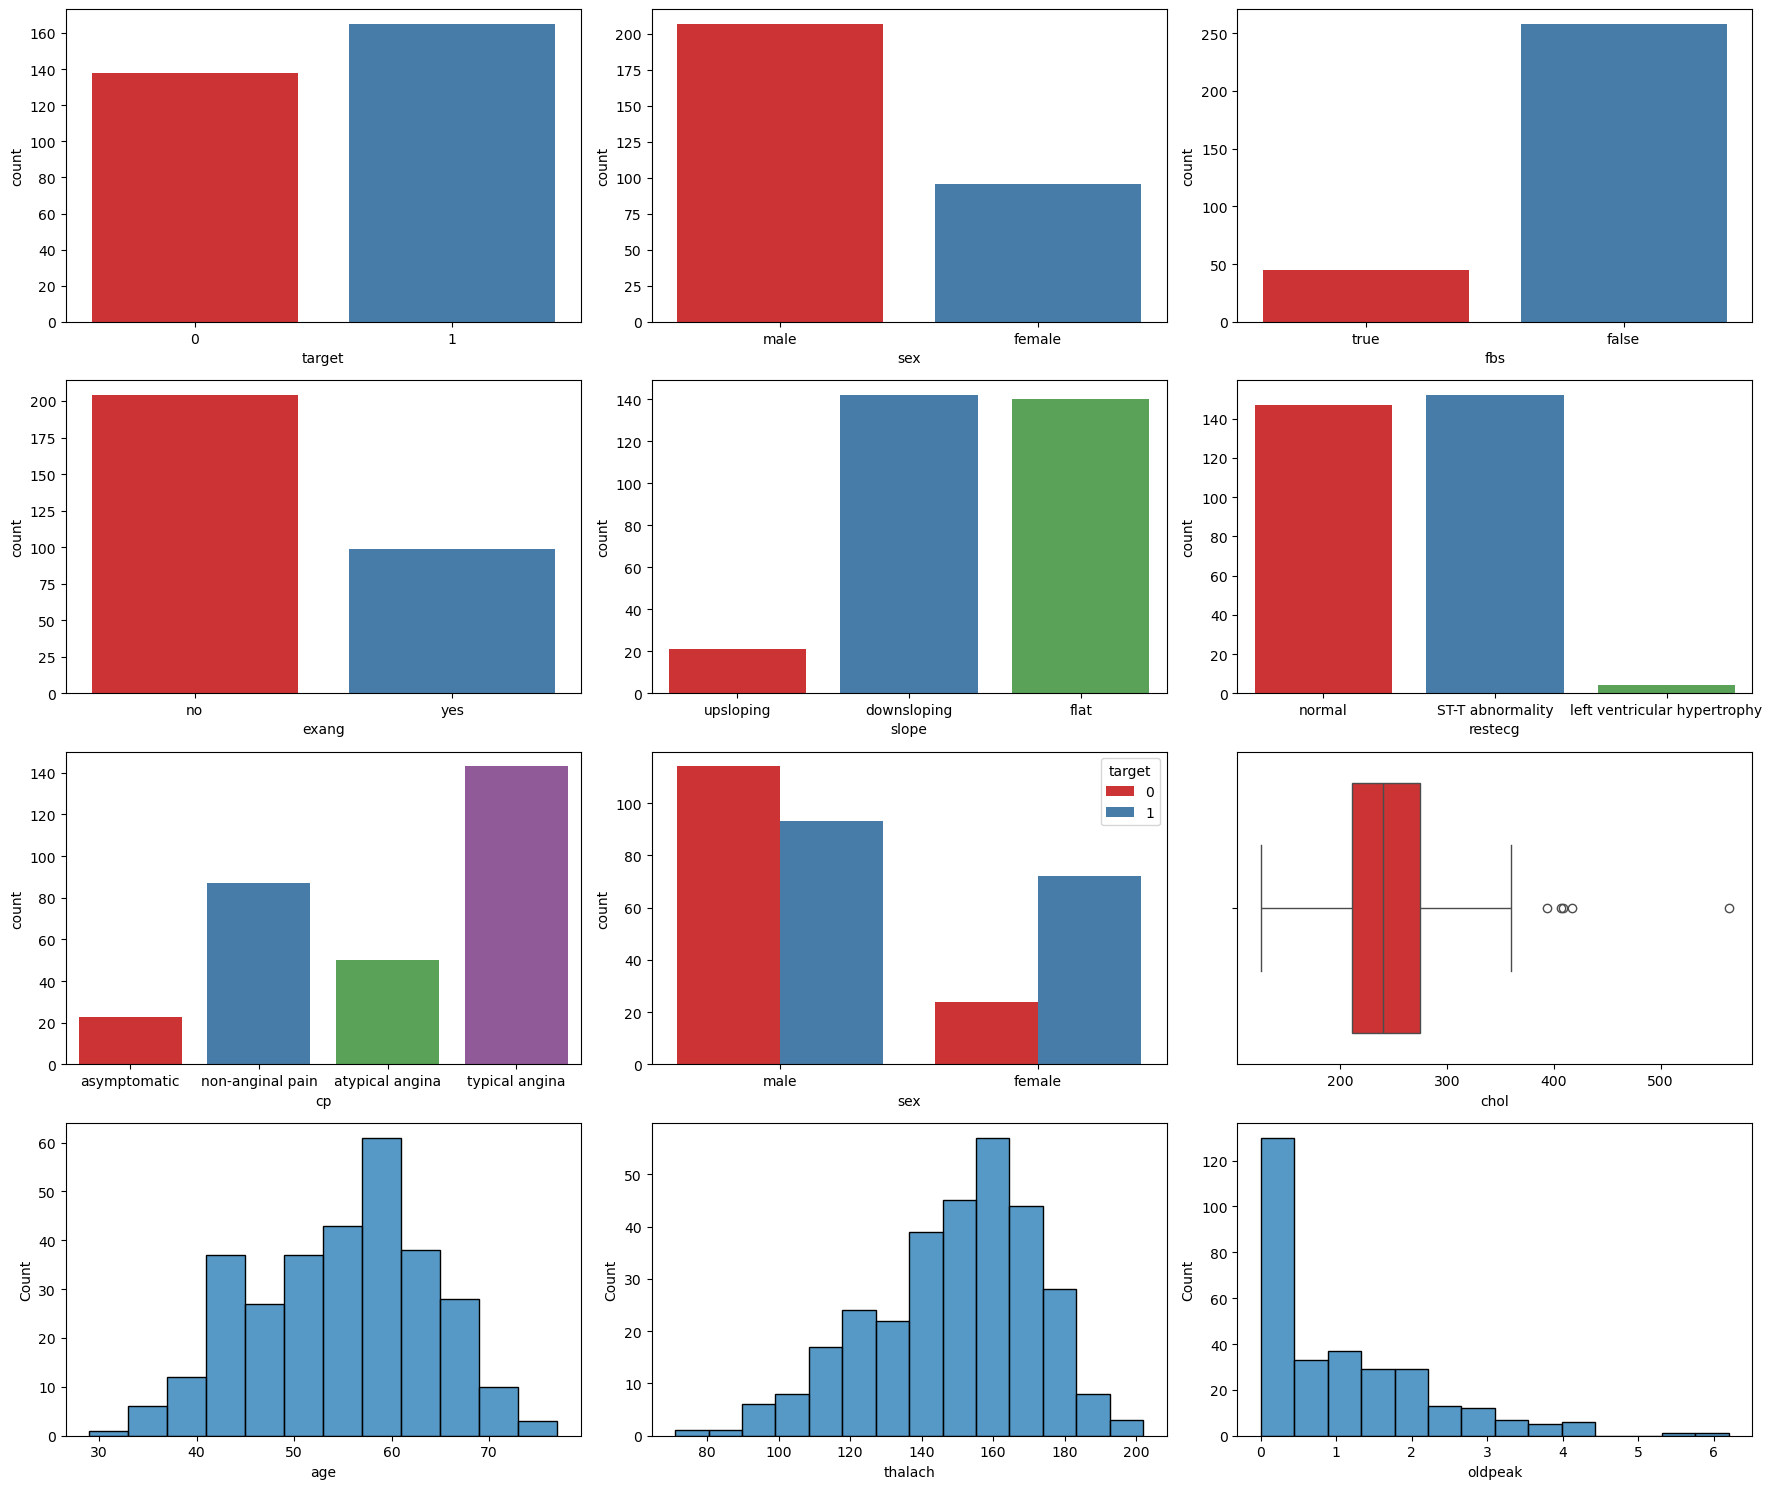

In [7]:
fig = plt.figure(figsize=(18, 15))

# First row
ax1 = plt.subplot2grid((4, 3), (0, 0))
sns.countplot(x=df1['target'], palette="Set1", ax=ax1)

ax2 = plt.subplot2grid((4, 3), (0, 1))
sns.countplot(x=df1['sex'], palette="Set1", ax=ax2)

ax3 = plt.subplot2grid((4, 3), (0, 2))
sns.countplot(x=df1['fbs'], palette="Set1", ax=ax3)

# Second row
ax4 = plt.subplot2grid((4, 3), (1, 0))
sns.countplot(x=df1['exang'], palette="Set1", ax=ax4)

ax5 = plt.subplot2grid((4, 3), (1, 1))
sns.countplot(x=df1['slope'], palette="Set1", ax=ax5)

ax6 = plt.subplot2grid((4, 3), (1, 2))
sns.countplot(x=df1['restecg'], palette="Set1", ax=ax6)

# Third row
ax7 = plt.subplot2grid((4, 3), (2, 0))
sns.countplot(x=df1['cp'], palette="Set1", ax=ax7)

ax8 = plt.subplot2grid((4, 3), (2, 1))
sns.countplot(x=df1['sex'], hue=df1['target'], palette="Set1", ax=ax8)

ax9 = plt.subplot2grid((4, 3), (2, 2))
sns.boxplot(x=df1["chol"],palette="Set1",ax=ax9)

ax10 = plt.subplot2grid((4, 3), (3, 0))
sns.histplot(x=df1["age"],palette="Set1", ax=ax10)

ax11 = plt.subplot2grid((4, 3), (3, 1))
sns.histplot(x=df1["thalach"], palette="Set1", ax=ax11)

# Third row
ax12 = plt.subplot2grid((4, 3), (3, 2))
sns.histplot(x=df1["oldpeak"] ,palette="Set1", ax=ax12)

plt.tight_layout()
plt.show()


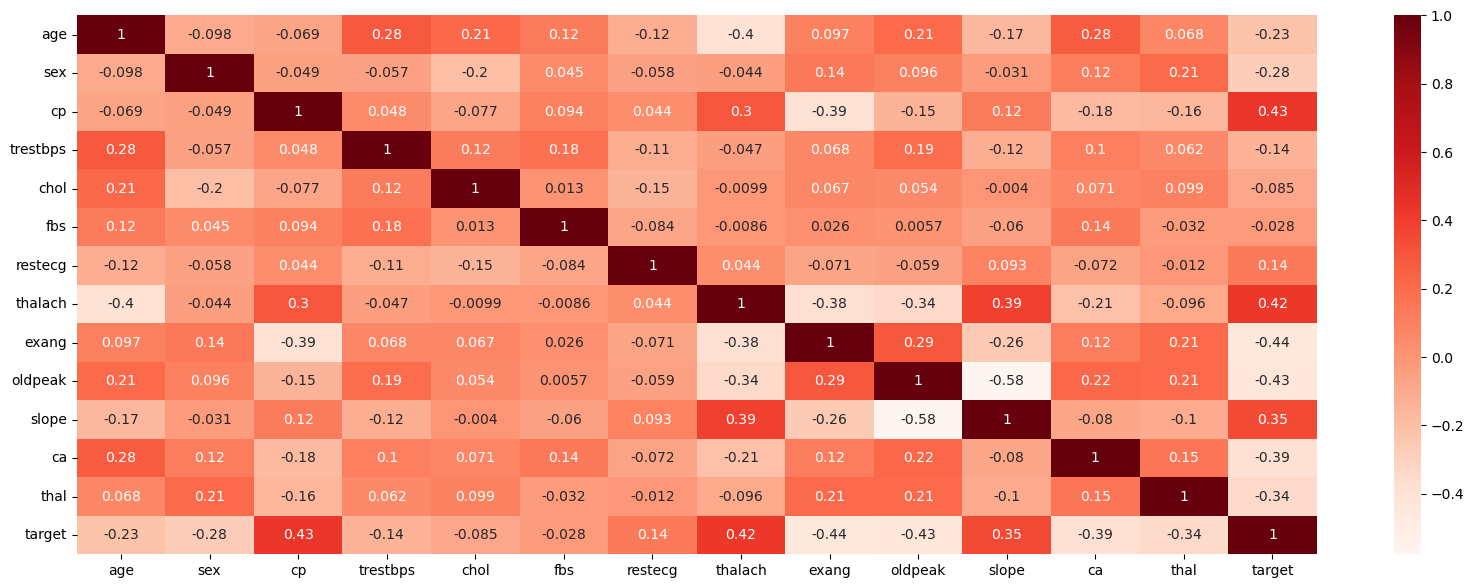

In [8]:
plt.figure(figsize=(20,7))
sns.heatmap(data= df.corr(),annot=True,cmap="Reds")
plt.show()

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Step II: Standardize Features Before Dimensionality Reduction</span>
</h1>


In [9]:
selected_features = ['age','sex','cp','trestbps','chol','fbs','restecg','thalach','exang','oldpeak','slope','ca','thal']

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Filter selected features
X_selected = df[selected_features].copy()
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Step III: Apply Dimentionality Reduction Technique</span>
</h1>


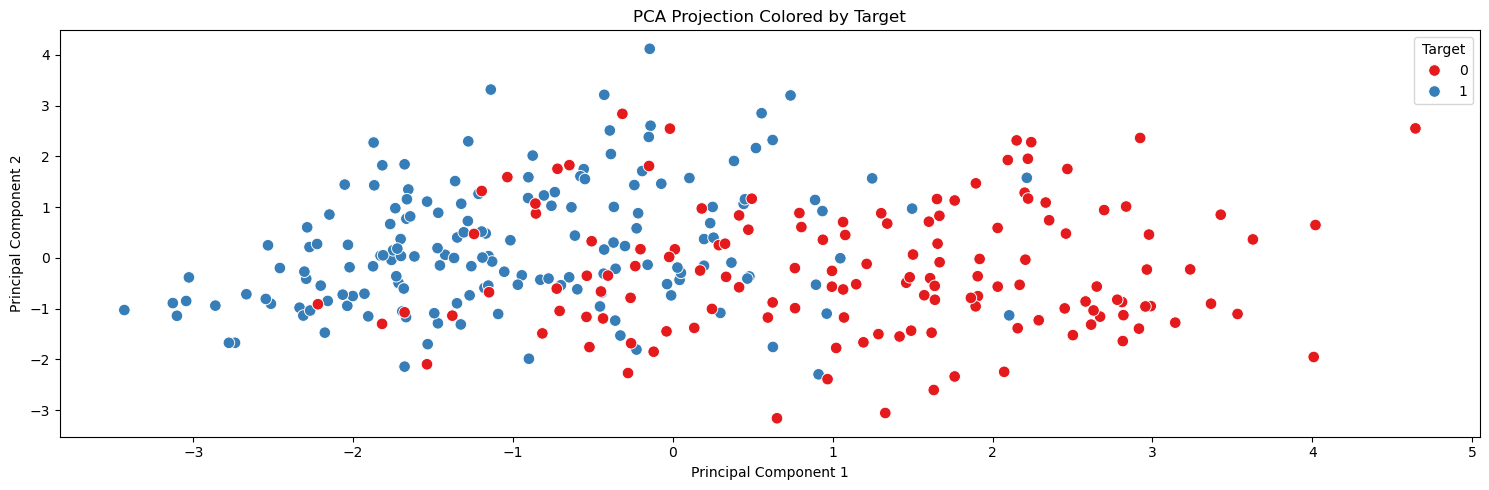

In [11]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = df1['target'].values

plt.figure(figsize=(15, 5))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set1', s=70)
plt.title('PCA Projection Colored by Target')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Target')
plt.tight_layout()
plt.show()

1) Preserves Global Structure:
- PCA retains global variance, making spatial relationships between points more meaningful for identifying clusters.

2) Distance Preservation:
- PCA better preserves Euclidean distances, which clustering algorithms like KMeans rely on.

3) Stable and Reproducible:
- PCA is deterministic — same output every time.

4) Suitable for Elbow/Silhouette Methods:
- PCA's output can be fed into methods like Elbow or Silhouette Score to evaluate optimal k.

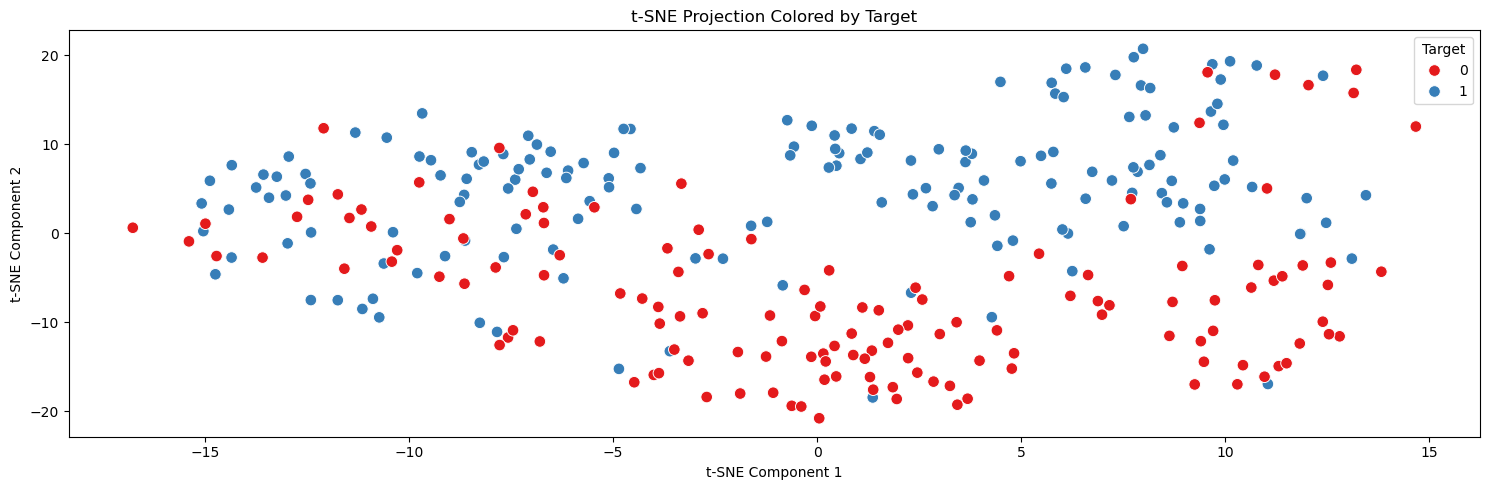

In [12]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)
tsne_df = pd.DataFrame(X_tsne, columns=['TSNE1', 'TSNE2'])
tsne_df['target'] = df1['target'].values

# Plot
plt.figure(figsize=(15, 5))
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='target', palette='Set1', s=70)
plt.title('t-SNE Projection Colored by Target')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Target')
plt.tight_layout()
plt.show()


1) Separation of Clusters:
- The t-SNE plot shows more distinct groupings between data points of different target values.
- PCA appears to show more overlap, especially in the center.

2) Non-linear Relationships:
- t-SNE captures non-linear patterns, which heart disease datasets often contain.
- PCA, being linear, might miss such complexity.

3) Target Distribution Visibility:
- In t-SNE, the coloring (by target) shows better visual grouping, meaning it’s more expressive of classification potential.

4) Data Compression Goal:
- t-SNE gives a richer low-dimensional expression.

| Criterion                  | PCA                                         | t-SNE                                     |
| -------------------------- | ------------------------------------------- | ----------------------------------------- |
| **Use case**               | Understand **global structure**, clustering | Understand **local grouping**, similarity |
| **Cluster Shape**          | Realistic and interpretable                 | Visually enhanced but distorted           |
| **Overlap Interpretation** | Meaningful                                  | Often distorted                           |
| **Trustworthy Distances**  | Yes                                         | No                                        |
| **Good for Clustering**    | ✅                                           | ❌ (visual only)                           |


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Step IV: Apply kMeans on Reduced Data</span>
</h1>


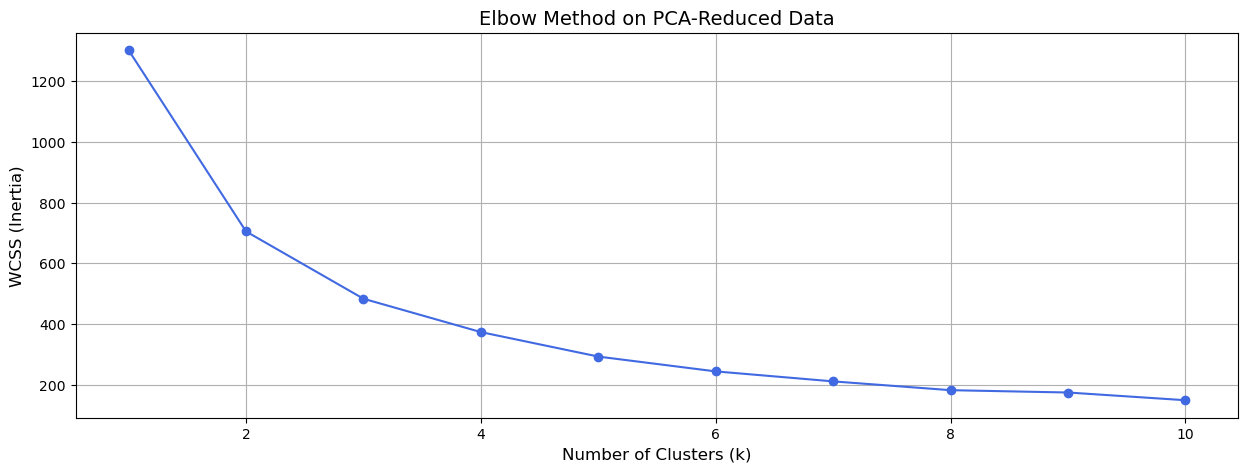

In [13]:
from sklearn.cluster import KMeans
k_range = range(1, 11)
wcss = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_pca)
    wcss.append(kmeans.inertia_)

# Plotting the Elbow Curve
plt.figure(figsize=(15, 5))
plt.plot(k_range, wcss, 'o-', color='royalblue')
plt.title("Elbow Method on PCA-Reduced Data", fontsize=14)
plt.xlabel("Number of Clusters (k)", fontsize=12)
plt.ylabel("WCSS (Inertia)", fontsize=12)
plt.grid(True)
plt.show()


- Optimal K = 3 (clear elbow).

- This aligns well with your earlier PCA plot where 3 visual groupings could be guessed.

- K=3 balances compactness (WCSS) with interpretability.


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Step V: Visualize Cluster Properly</span>
</h1>


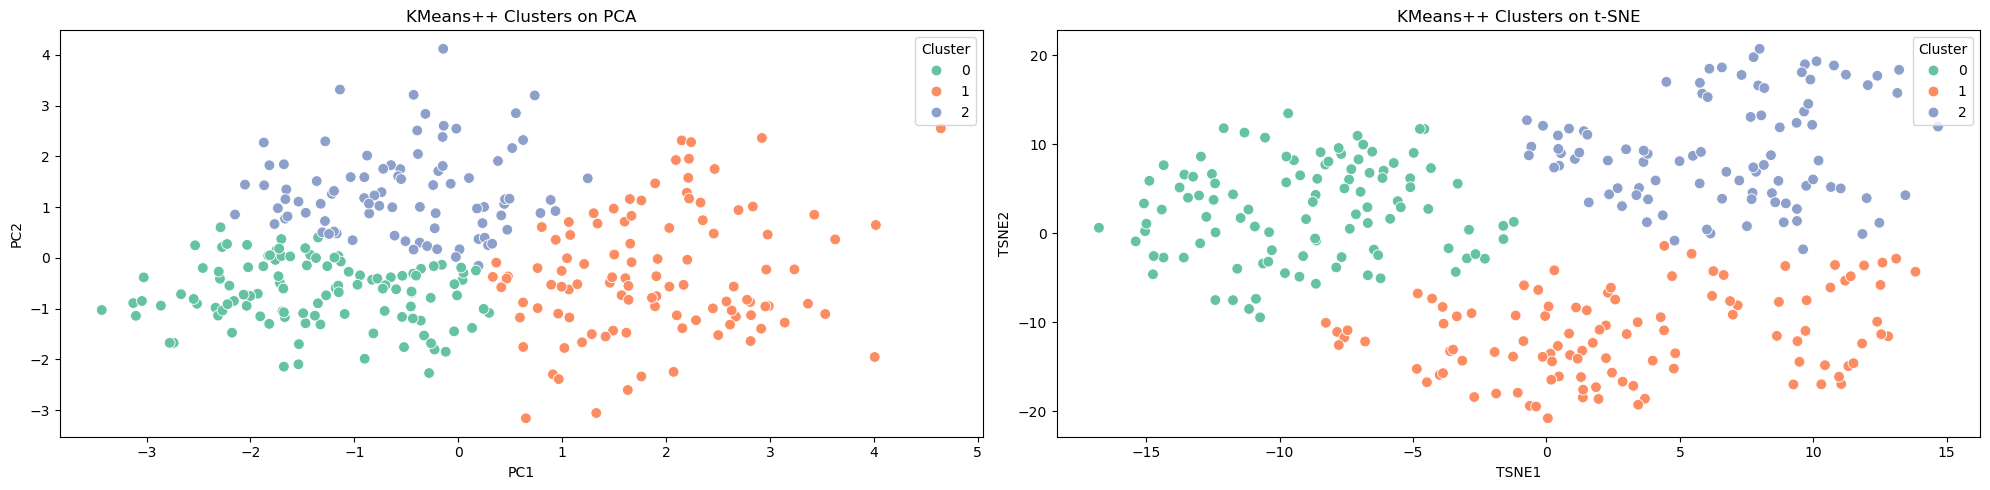

In [14]:
kmeans_pca = KMeans(n_clusters=3, init='k-means++', random_state=42)
pca_df['cluster'] = kmeans_pca.fit_predict(pca_df[['PC1', 'PC2']])

# KMeans++ clustering on t-SNE data
kmeans_tsne = KMeans(n_clusters=3, init='k-means++', random_state=42)
tsne_df['cluster'] = kmeans_tsne.fit_predict(tsne_df[['TSNE1', 'TSNE2']])

# Plotting
plt.figure(figsize=(20, 5))

# PCA Plot
plt.subplot(1, 2, 1)
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='cluster', palette='Set2', s=60)
plt.title('KMeans++ Clusters on PCA')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(title='Cluster')

# t-SNE Plot
plt.subplot(1, 2, 2)
sns.scatterplot(data=tsne_df, x='TSNE1', y='TSNE2', hue='cluster', palette='Set2', s=60)
plt.title('KMeans++ Clusters on t-SNE')
plt.xlabel('TSNE1')
plt.ylabel('TSNE2')
plt.legend(title='Cluster')

plt.tight_layout()
plt.show()


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Step VI: Compare means/medians of each feature per cluster</span>
</h1>


In [15]:
df['cluster_pca'] = kmeans_pca.labels_

In [16]:
cluster_summary_mean = df.groupby('cluster_pca')[selected_features].mean().round(2)
cluster_summary_median = df.groupby('cluster_pca')[selected_features].median().round(2)

In [17]:
summary = pd.concat([cluster_summary_mean, cluster_summary_median],keys=['Mean', 'Median'])
summary

age   sex    cp  trestbps    chol   fbs  restecg  \
       cluster_pca                                                       
Mean   0            46.93  0.77  1.10    123.67  228.04  0.04     0.71   
       1            58.16  0.78  0.26    134.90  251.22  0.16     0.44   
       2            59.40  0.46  1.64    137.94  263.80  0.26     0.39   
Median 0            46.00  1.00  1.00    122.00  226.00  0.00     1.00   
       1            59.00  1.00  0.00    130.00  254.00  0.00     0.00   
       2            59.00  0.00  2.00    136.00  255.00  0.00     0.00   

                    thalach  exang  oldpeak  slope    ca  thal  
       cluster_pca                                              
Mean   0             163.79   0.16     0.48   1.65  0.27  2.24  
       1             130.54   0.71     1.94   0.97  1.34  2.59  
       2             154.28   0.08     0.68   1.59  0.60  2.08  
Median 0             163.00   0.00     0.00   2.00  0.00  2.00  
       1             131.50   1.00     1.80   1.00  1.00  3.00  
       2             157.00   0.00     0.40   2.00  0.00  2.00

<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Step VII: Validate Cluster Quality</span>
</h1>


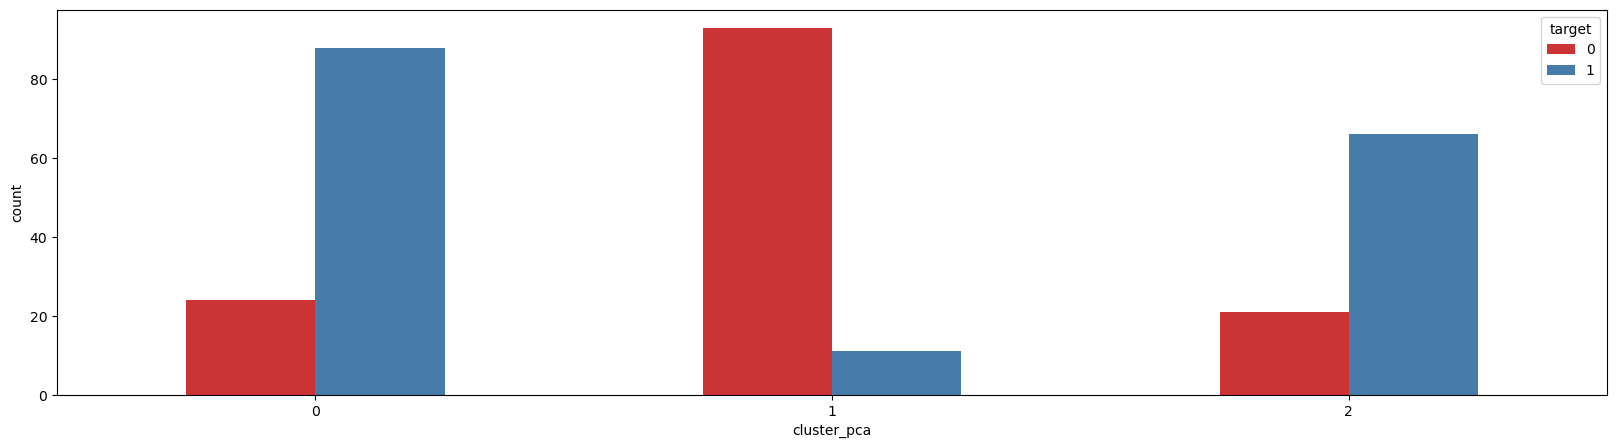

In [18]:
plt.figure(figsize=(20,5))
sns.countplot(x=df["cluster_pca"],palette="Set1",width=0.5,hue=df["target"])
plt.show()

| Feature       | Cluster 0                                                                                  | Cluster 1                                                                                   | Cluster 2                                                                                   |
|---------------|---------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|----------------------------------------------------------------------------------------------|
| Age           | Youngest group (~47); likely low cardiac risk due to age.                                  | Oldest group (~58); increased age-related risk.                                              | Older group (~59); similar to Cluster 1, possibly health-conscious.                         |
| cp            | Mostly atypical angina; moderate chest pain symptoms.                                      | Mostly asymptomatic; many report no chest pain.                                              | Highest chest pain levels; more likely to report angina symptoms.                           |
| trestbps      | Lowest resting BP; indicates better cardiovascular baseline.                               | Slightly high BP; mild hypertension signs.                                                   | Moderate BP; similar to Cluster 1 but healthier than Cluster 1 on other parameters.          |
| chol          | Lowest cholesterol; supports low cardiovascular risk.                                      | Highest cholesterol; major risk for atherosclerosis.                                         | Intermediate cholesterol levels; not optimal but not critical.                              |
| fbs           | Similar fasting blood sugar across all clusters; not a strong differentiator.              | Slightly more elevated cases but not significantly.                                          | Slightly elevated; no clear separation.                                                      |
| restecg       | Mostly normal ECG results; indicates stable heart rhythm.                                  | Slight increase in abnormalities; could indicate heart stress.                              | Mostly normal ECG readings; not a defining factor.                                           |
| thalach       | Highest max heart rate (~164); best cardiac output.                                        | Lowest (~130); poor heart rate response; likely unfit or diseased.                          | High (~154); good heart health with better response than Cluster 1.                          |
| exang         | Very few report exercise-induced angina; strong heart resilience.                          | Majority report angina on exertion; a clear cardiac warning.                                | Very low occurrence of exercise angina; indicates heart health.                              |
| oldpeak       | Minimal ST depression (~0.5); normal cardiac recovery post-exercise.                       | Highest ST depression (~1.9); significant ischemia indication.                              | Low ST depression (~0.68); relatively healthy cardiac recovery.                              |
| slope         | Mostly upsloping; healthy heart recovery pattern.                                          | Flatter/downsloping; a sign of compromised cardiac output.                                  | Mostly upsloping; again, aligned with healthy heart conditions.                             |
| ca            | Few vessels colored (~0.27); minimal arterial blockage.                                    | Highest vessel coloring (~1.3); significant blockage and narrowing.                         | Moderate (~0.60); less blockage than Cluster 1 but more than Cluster 0.                      |
| thal          | Mostly normal or minor reversible defect cases (~2.24).                                    | High thal value (~2.59); associated with fixed perfusion defects.                           | Lowest (~2.08); mostly normal thal levels indicating healthy perfusion.                      |
| target        | Majority non-disease cases (target=0); healthy heart group.                                | Almost all are disease cases (target=1); severe risk cluster.                               | Mixed group with slightly higher healthy count than Cluster 1, but not as healthy as Cluster 0. |


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Step VIII: 3D techniques to uncover hidden pattern</span>
</h1>


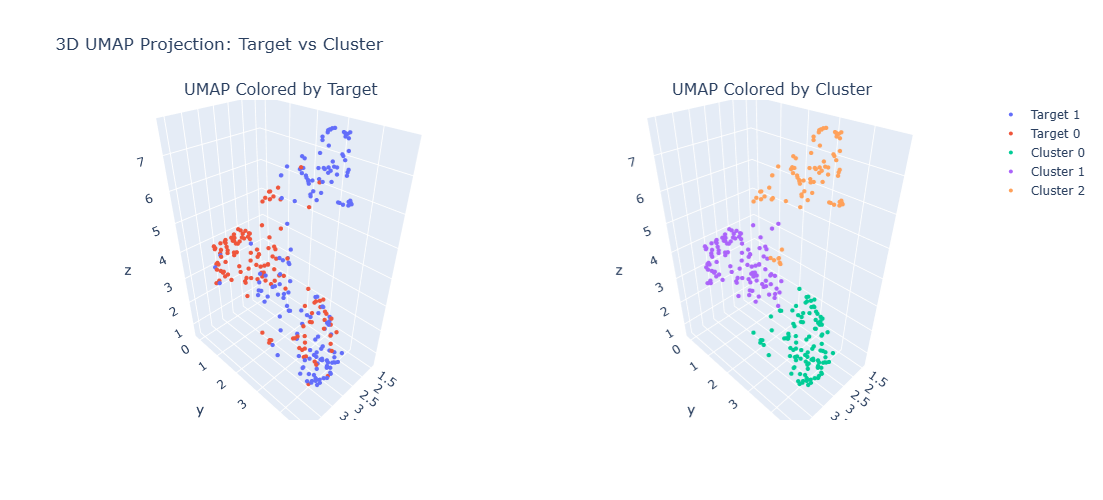

In [19]:
import umap
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from sklearn.cluster import KMeans

# Step 1: UMAP Transformation
umap_3d = umap.UMAP(n_components=3, random_state=42)
umap_3d_proj = umap_3d.fit_transform(X_scaled)

# Step 2: Create DataFrame
umap3d_df = pd.DataFrame(umap_3d_proj, columns=['UMAP1', 'UMAP2', 'UMAP3'])
umap3d_df['Cluster'] = KMeans(n_clusters=3, init='k-means++', random_state=42).fit_predict(umap_3d_proj)
umap3d_df['target'] = df['target'].values

# Step 3: Create Side-by-Side Subplots
fig = make_subplots(
    rows=1, cols=2,
    specs=[[{'type': 'scatter3d'}, {'type': 'scatter3d'}]],
    subplot_titles=("UMAP Colored by Target", "UMAP Colored by Cluster")
)

# Subplot 1: Colored by Target
for label in umap3d_df['target'].unique():
    subset = umap3d_df[umap3d_df['target'] == label]
    fig.add_trace(
        go.Scatter3d(
            x=subset['UMAP1'], y=subset['UMAP2'], z=subset['UMAP3'],
            mode='markers',
            name=f'Target {label}',
            marker=dict(size=4),
        ),
        row=1, col=1
    )

# Subplot 2: Colored by Cluster
for label in sorted(umap3d_df['Cluster'].unique()):
    subset = umap3d_df[umap3d_df['Cluster'] == label]
    fig.add_trace(
        go.Scatter3d(
            x=subset['UMAP1'], y=subset['UMAP2'], z=subset['UMAP3'],
            mode='markers',
            name=f'Cluster {label}',
            marker=dict(size=4),
        ),
        row=1, col=2
    )

# Layout settings
fig.update_layout(
    width=1000,
    height=500,
    title_text="3D UMAP Projection: Target vs Cluster",
    showlegend=True
)

fig.show()


<h1 style="
  font-family: 'Americana XBdCn BT';
  text-shadow: 2px 2px 4px rgba(0,0,0,0.2);
  font-size: 40px;
  font-weight: bold;
  background: linear-gradient(to right,  #e0f0ea, #f7f0e8);
  letter-spacing: 0px;
  color: #d68b79;
  border-radius: 40px;
  text-align: left;
  line-height: 1;
  padding: 8px 9px;
">
  <span>Myths about UMAP...</span>
</h1>


- These are not original features but compressed latent dimensions learned from your data.
- UMAP derives new axes to capture both local neighbor structure and global layout from the high-dimensional space.
- Do not interpret axes like 'age' or 'chol'; they are abstract representations summarizing multiple features.
- Each color in the plot indicates a distinct KMeans++ cluster assigned after UMAP projection.
- Points that are close together indicate high similarity in original feature space (e.g., similar age, cp, thalach, etc.).
- If clusters are well-separated, it suggests meaningful structure exists in your data that KMeans could exploit.
- Dense regions within clusters suggest high internal similarity among those observations.
- More spread-out regions indicate greater diversity or variance within that cluster's samples.
- The 3D plot is interactive — rotate it to examine how compact or loose each cluster appears from different angles.
- Labels like 0, 1, and 2 come from KMeans clustering, not from UMAP itself.
- UMAP only reduces the dimensionality to 3D; clustering was performed afterward by KMeans.
- The clusters visualized are a combined result of UMAP’s projection and KMeans++ clustering over that projection.
